In [3]:
import numpy as np

width = 15
height = 5

y_final = width - 1
x_final = height - 1

y_wells = [0, 1, 3, 5, 5, 7, 9, 11, 12, 14]
x_wells = [3, 1, 3, 0, 4, 1, 3, 2, 4, 1]

standard_reward = -0.1
tunel_rewards = np.ones(shape=(height, width)) * standard_reward

for x_well, y_well in zip(x_wells, y_wells):
    tunel_rewards[x_well, y_well] = -5.0
tunel_rewards[x_final, y_final] = 5.0


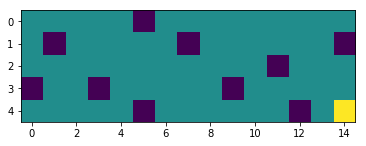

In [14]:
import matplotlib.pyplot as plt

plt.imshow(tunel_rewards)

In [15]:
nb_actions = 4

policy = np.random.randint(0, nb_actions, size=(height, width)).astype(np.uint8)
tunnel_values = np.zeros(shape=(height, width))

gamma = 0.9

In [17]:
def policy_evaluation():
    """
    determine if optimal policy
    action_0 = ^
    action_1 = ->
    action_2 = down
    action_3 = <-
    """
    old_tunnel_values = tunnel_values.copy()
    for i in range(height):
        for j in range(width):
            action = policy[i, j]
            if action == 0:
                if i == 0: # handle action at the upper boundary
                    x = 0
                else:
                    x = i - 1
            elif action == 1:
                if j == width - 1:
                    y = width - 1 # handle action at the right boarder
                else: 
                    y = j + 1
                x = i
            elif action == 2:
                if i == height- 1:
                    x = height - 1 # handle action at the lower boarder
                else: 
                    x = i + 1
                y = j
            else:
                if j == 0:
                    y = 0 # handle action at the right boarder
                else: 
                    y = j - 1
                x = i        
            reward = tunel_rewards[x,y] # reward given at the end of the action
            tunnel_values[i, j] = reward + gamma * old_tunnel_values[x, y]
                

In [18]:
def is_final(x, y):
    if (x,y) in zip(x_wells, y_wells) or (x, y) == (x_final, y_final):
        return True
    return False

In [25]:
def policy_improvement():
    """
    change policy matrix
    action_0 = ^
    action_1 = ->
    action_2 = down
    action_3 = <-
    """
    for i in range(hieght):
        for j in range(width):
            if is_final(i, j):
                continue
            values = np.zeros(shape=(nb_actions, ))
            values[0] = (tunel_rewards[i - 1, j] + gamma * tunnel_values[i - 1, j]) if i > 0 else -np.inf
            values[1] = (tunel_rewards[i , j + 1] + gamma * tunnel_values[i, j + 1]) if j < width - 1 else -np.inf
            values[2] = (tunel_rewards[i + 1, j] + gamma * tunnel_values[i + 1, j]) if i < height - 1 else -np.inf
            values[3] = (tunel_rewards[i, j - 1] + gamma * tunnel_values[i, j - 1]) if j > 0 else -np.inf   

Training steps


In [ ]:
nb_max_epochs = 100000
tolerance = 1e-5

epochs = 0

while epochs < nb_max_epochs:
    epochs += 1
    old_tunnel_values = tunnel_values.copy()
    policy_evaluation()
    if np.mean(np.abs(tunnel_values - old_tunnel_values)) < tolerance:
        old_policy = policy.copy()
        policy_improvement()

        if np.sum(policy - old_policy) == 0:
            break
